In [43]:
import os

In [44]:
print(os.getcwd())

C:\Users\lasts\Kaggle


In [45]:
for dirname, _, filenames in os.walk('./sample_data'):
    for filename in filenames:
        file_path = os.path.join(dirname, filename)
        print(file_path)

./sample_data\Sleep_health_and_lifestyle_dataset.csv


In [46]:
import pandas as pd

In [47]:
data = pd.read_csv(file_path)

data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


## Groupby 메서드 활용

BMI Category를 기준으로 그룹화
 - mean   : 평균
 - std    : 표준편차
 - medain : 중앙값

In [48]:
grouped_data = data.groupby('BMI Category').agg({
    'Sleep Duration': ['mean', 'std'],
    'Daily Steps': ['mean', 'median'],
    'Stress Level': ['mean', 'max']
})

In [49]:
print(grouped_data)

             Sleep Duration            Daily Steps         Stress Level    
                       mean       std         mean  median         mean max
BMI Category                                                               
Normal             7.387963  0.718165  6875.462963  7300.0     5.134259   8
Obese              6.960000  0.883428  3350.000000  3400.0     5.700000   8
Overweight         6.770270  0.757768  6965.540541  6000.0     5.729730   8


## Matplotlib과 seaborn를 활요하여 그래프 그리기

## 2-2-1. BMI별 수면 시간 그래프

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

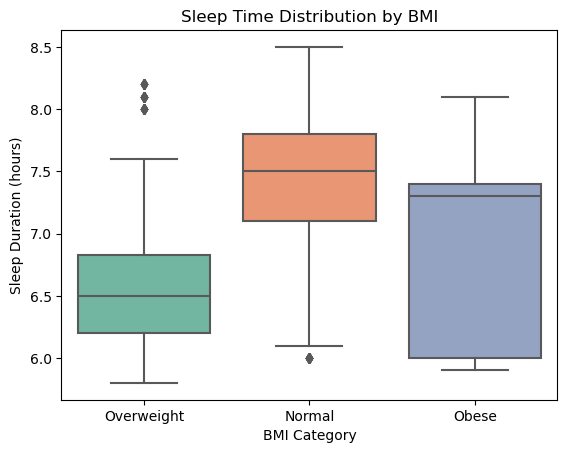

In [51]:
sns.boxplot(x='BMI Category', y='Sleep Duration', data=data, palette='Set2')
plt.title('Sleep Duration Distribution by BMI')
plt.xlabel('BMI Category')
plt.ylabel('Sleep Duration (hours)')
plt.show()

## 2-2-2. 수면 시간과 스트레스 수준의 관계

  inf Future warning problem 발생

D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


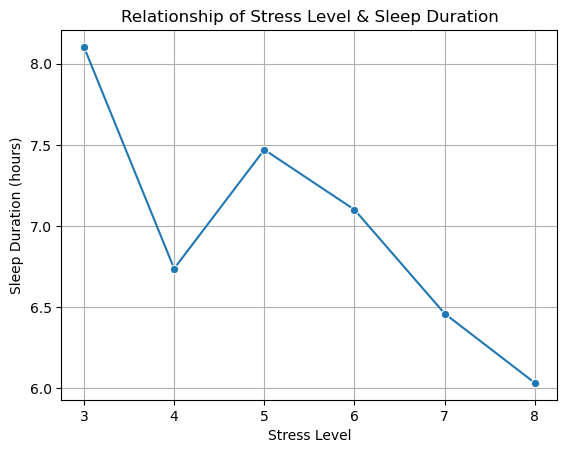

In [66]:
line_data = data.groupby('Stress Level')['Sleep Duration'].mean().reset_index()

sns.lineplot(
    x='Stress Level',
    y='Sleep Duration',
    data=line_data,
    marker='o'
)

plt.title('Relationship of Stress Level & Sleep Duration')
plt.xlabel('Stress Level')
plt.ylabel('Sleep Duration (hours)')
plt.grid(True)
plt.show()

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Preprocessing
# Encoding categorical variables
data_encoded = data.copy()
categorical_columns = ['Gender', 'BMI Category', 'Sleep Disorder', 'Occupation']
encoder = LabelEncoder()
for col in categorical_columns:
    data_encoded[col] = encoder.fit_transform(data_encoded[col])

# Selecting features and target variable
features = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 
            'Stress Level', 'Daily Steps', 'Heart Rate', 'Gender', 'BMI Category']
target = 'Sleep Disorder'
X = data_encoded[features]
y = data_encoded[target]

# Scaling numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

accuracy

0.8387096774193549